In [1]:
%matplotlib inline


from neuron import h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
import os

from cell_inference.utils.plotting.plot_results import plot_lfp_traces, plot_lfp_heatmap
from cell_inference.utils.feature_extractors.SummaryStats2D import calculate_stats, build_lfp_grid
from cell_inference.cells.stylizedcell import CellTypes
from cell_inference.cells.activecell import ActiveCell
from cell_inference.cells.passivecell import PassiveCell
from cell_inference.cells.simulation import Simulation
from cell_inference.utils.currents.recorder import Recorder
from cell_inference.config import paths, params
from cell_inference.utils.feature_extractors.parameterprediction import ClassifierTypes, ClassifierBuilder

cell_type = CellTypes.ACTIVE

h.nrn_load_dll(paths.COMPILED_LIBRARY)
geo_standard = pd.read_csv(paths.GEO_STANDARD,index_col='id')
h.tstop = params.TSTOP
h.dt = params.DT

In [2]:
DATA_PATH = 'cell_inference/resources/simulation_data'
TRIAL_PATH = os.path.join(DATA_PATH, 'Ori3_params')

LFP_PATH = os.path.join(TRIAL_PATH, 'lfp.npz')  # LFP and labels

lfp   = np.load(LFP_PATH)['x']
print(lfp.shape)
labels = np.load(LFP_PATH)['y']
summ_stats = []
for i in range(lfp.shape[0]):
    g_lfp, _ = build_lfp_grid(lfp[i], params.ELECTRODE_POSITION)
    summ_stats.append(calculate_stats(g_lfp))
summ_stats = np.array(summ_stats)

(1000, 176, 384)


In [8]:
from cell_inference.utils.feature_extractors.helperfunctions import train_regression, build_dataloader_from_numpy

data = summ_stats
print(data.shape)

train_loader, test_loader = build_dataloader_from_numpy(input_arr=data, labels_arr=labels, batch_size=2)

(1000, 40)


In [9]:
from cell_inference.utils.feature_extractors.fullyconnectednetwork import FullyConnectedNetwork, ActivationTypes
from cell_inference.utils.feature_extractors.convolutionalnetwork import ConvolutionalNetwork
import torch

# model1 = ConvolutionalNetwork(in_channels=1, num_labels=2)
# model1 = torch.load('cell_inference/resources/results/pytorch_models/16_23_59__01_04_2022.pt')
model1 = FullyConnectedNetwork(in_features=40, out_features=3)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #torch.device("cpu")
model1.to(device)

train_regression(model1, train_loader, test_loader, 300, learning_rate=0.01, decay_rate=0.95, device=device)

  0%|          | 1/300 [00:01<05:12,  1.04s/it]

Training Loss: 309628.63122558594 Validation Loss: 100200.38056945801


  4%|▎         | 11/300 [00:09<04:06,  1.17it/s]

Training Loss: 309288.80532836914 Validation Loss: 100137.92576599121


  7%|▋         | 21/300 [00:20<04:41,  1.01s/it]

Training Loss: 308924.6665496826 Validation Loss: 100156.87821960449


 10%|█         | 31/300 [00:30<04:30,  1.00s/it]

Training Loss: 308731.9676742554 Validation Loss: 100205.03123474121


 14%|█▎        | 41/300 [00:40<04:20,  1.01s/it]

Training Loss: 308550.4474143982 Validation Loss: 100245.36804199219


 17%|█▋        | 51/300 [00:50<04:11,  1.01s/it]

Training Loss: 308330.6425743103 Validation Loss: 100282.18840026855


 20%|██        | 61/300 [01:00<04:03,  1.02s/it]

Training Loss: 308061.9331359863 Validation Loss: 100311.2582244873


 24%|██▎       | 71/300 [01:10<03:35,  1.06it/s]

Training Loss: 307731.2944717407 Validation Loss: 100355.90309143066


 27%|██▋       | 81/300 [01:20<03:41,  1.01s/it]

Training Loss: 307353.6191482544 Validation Loss: 100425.63223266602


 30%|███       | 91/300 [01:30<03:30,  1.01s/it]

Training Loss: 306952.6404685974 Validation Loss: 100522.17630004883


 34%|███▎      | 101/300 [01:40<03:24,  1.03s/it]

Training Loss: 306497.1201438904 Validation Loss: 100663.43231201172


 37%|███▋      | 111/300 [01:51<03:13,  1.02s/it]

Training Loss: 306090.97842407227 Validation Loss: 100771.72456359863


 40%|████      | 121/300 [02:01<03:02,  1.02s/it]

Training Loss: 305750.91775131226 Validation Loss: 100884.69235229492


 44%|████▎     | 131/300 [02:11<02:54,  1.03s/it]

Training Loss: 305452.29236984253 Validation Loss: 100985.62014770508


 47%|████▋     | 141/300 [02:21<02:43,  1.03s/it]

Training Loss: 305171.3431930542 Validation Loss: 101074.04556274414


 50%|█████     | 151/300 [02:32<02:37,  1.05s/it]

Training Loss: 304937.73444747925 Validation Loss: 101146.04159545898


 54%|█████▎    | 161/300 [02:42<02:23,  1.03s/it]

Training Loss: 304714.99325561523 Validation Loss: 101216.38513183594


 57%|█████▋    | 171/300 [02:52<02:11,  1.02s/it]

Training Loss: 304508.1368713379 Validation Loss: 101282.7043762207


 60%|██████    | 181/300 [03:02<01:55,  1.03it/s]

Training Loss: 304316.6468658447 Validation Loss: 101352.23663330078


 64%|██████▎   | 191/300 [03:11<01:44,  1.05it/s]

Training Loss: 304136.27895355225 Validation Loss: 101406.47351074219


 67%|██████▋   | 201/300 [03:22<01:40,  1.01s/it]

Training Loss: 303993.1619644165 Validation Loss: 101463.20822143555


 70%|███████   | 211/300 [03:31<01:28,  1.01it/s]

Training Loss: 303861.31356811523 Validation Loss: 101508.45553588867


 74%|███████▎  | 221/300 [03:41<01:19,  1.00s/it]

Training Loss: 303736.7901382446 Validation Loss: 101545.7026977539


 77%|███████▋  | 231/300 [03:51<01:10,  1.02s/it]

Training Loss: 303624.2151489258 Validation Loss: 101581.41049194336


 80%|████████  | 241/300 [04:02<01:00,  1.03s/it]

Training Loss: 303529.2807159424 Validation Loss: 101616.25425720215


 84%|████████▎ | 251/300 [04:12<00:49,  1.01s/it]

Training Loss: 303436.1001968384 Validation Loss: 101647.95858764648


 87%|████████▋ | 261/300 [04:22<00:39,  1.02s/it]

Training Loss: 303351.7358856201 Validation Loss: 101672.68533325195


 90%|█████████ | 271/300 [04:32<00:29,  1.00s/it]

Training Loss: 303277.641998291 Validation Loss: 101691.84782409668


 94%|█████████▎| 281/300 [04:42<00:17,  1.08it/s]

Training Loss: 303202.9697265625 Validation Loss: 101707.0588684082


 97%|█████████▋| 291/300 [04:52<00:09,  1.02s/it]

Training Loss: 303139.93868255615 Validation Loss: 101721.86541748047


100%|██████████| 300/300 [05:01<00:00,  1.00s/it]


In [10]:
from sklearn.metrics import r2_score
from cell_inference.utils.transform.geometry_transformation import hphi2unitsphere, unitsphere2hphi, trivarnorm2unitsphere

train_loader, test_loader = build_dataloader_from_numpy(input_arr=data, labels_arr=labels, batch_size=128)

x, y = next(iter(test_loader))
model1.eval()
x = x.to(device)
output = model1(x)
output = output.to("cpu").detach().numpy()
y = y.to("cpu").detach().numpy()

h_out, phi_out = tuple(np.hsplit(unitsphere2hphi(trivarnorm2unitsphere(np.hstack((output[:,0], output[:,1], output[:,2])))),2))
h_lab, phi_lab = tuple(np.hsplit(unitsphere2hphi(trivarnorm2unitsphere(np.hstack((y[:,0], y[:,1], y[:,2])))),2))

# print("R2: {}".format(r2_score(y, output)))

print("R2 h: {}".format(r2_score(h_lab, h_out)))
print("R2 phi: {}".format(r2_score(phi_lab, phi_out)))
print(output.shape)
print(y.shape)

R2 h: -0.827162940852525
R2 phi: -1.1940150414856738
(128, 3)
(128, 3)


<IPython.core.display.Javascript object>


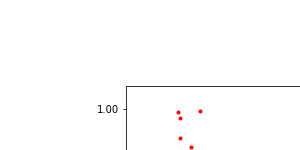

In [11]:
%matplotlib notebook

idx = 0

plt.figure(figsize=(14, 10))
#inf_list = ['r_s', 'l_t', 'r_t', 'r_d', 'r_tu', 'l_d']

ax_t = plt.subplot(121)
ax_t.scatter(h_lab, h_out, c='red', marker='.')
ax_t.set_xlabel('h real')
ax_t.set_ylabel('h pred')

ax_t = plt.subplot(122)
ax_t.scatter(phi_lab, phi_out, c='red', marker='.')
ax_t.set_xlabel('phi real')
ax_t.set_ylabel('phi pred')

# ax_t = plt.subplot(324)
# ax_t.scatter(y[:,3], output[:,3], c='red', marker='.')
# ax_t.set_xlabel('dendrite radius real')
# ax_t.set_ylabel('dendrite radius pred')

# ax_t = plt.subplot(325)
# ax_t.scatter(y[:,4], output[:,4], c='red', marker='.')
# ax_t.set_xlabel('tuft radius real')
# ax_t.set_ylabel('tuft radius pred')

# ax_t = plt.subplot(326)
# ax_t.scatter(y[:,5], output[:,5], c='red', marker='.')
# ax_t.set_xlabel('dendrite length real')
# ax_t.set_ylabel('dendrite length pred')

plt.show()

In [ ]:
%matplotlib notebook

idx = 0#[0, 1, 2, 3, 4, 5]

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(y[idx,0], y[idx,1], y[idx,2], c='green', marker='.')
ax.scatter3D(output[idx,0], output[idx,1], output[idx,2], c='red', marker='^')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plt.show()